In [2]:
import pandas as pd
import numpy as np

In [90]:
gan_df = pd.read_csv('data/generated_data_with_labels_v10.csv')

In [91]:
# without e notation
pd.options.display.float_format = '{:.2f}'.format
gan_df['weekly_tx_count_of_recipient'].describe()

count   300000.00
mean         0.05
std          0.02
min         -0.08
25%          0.04
50%          0.05
75%          0.06
max          0.22
Name: weekly_tx_count_of_recipient, dtype: float64

In [92]:
gan_df['reported'].value_counts()

0.00    297000
1.00      3000
Name: reported, dtype: int64

In [93]:
import torch.nn as nn
import torch

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(46, 23),  # Encode_1: 48 -> 24
            nn.Tanh(),
            nn.Linear(23, 12),  # Encode_2: 24 -> 12
            nn.ReLU(),
            nn.Linear(12, 6),  # Encode_3: 12 -> 6
            nn.LeakyReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),  # Decode_1: 6 -> 12
            nn.Tanh(),
            nn.Linear(12, 23),  # Decode_2: 12 -> 24
            nn.ReLU(),
            nn.Linear(23, 46),  # Decode_3: 24 -> 48
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [68]:
# read the saved model
saved_model = Autoencoder()
saved_model.load_state_dict(torch.load('../../models/autoencoder.pth'))

<All keys matched successfully>

In [69]:
input_columns = ['amount', 'day', 'month', 'year', 'weekofyear', 'is_weekend', 'day_of_week', 'quarter', 'daily_tx_count_of_recipient', 'daily_tx_count_of_sender',
    'daily_tx_count_of_recipient_accNumber', 'weekly_tx_count_of_recipient', 'weekly_tx_count_of_sender', 'weekly_tx_count_of_recipient_accNumber',
    'monthly_tx_count_of_recipient', 'monthly_tx_count_of_sender', 'monthly_tx_count_of_recipient_accNumber','recipient_acc_per_recipient_name',
    'sender_per_recipient_name', 'weekly_tx_amount_of_recipient', 'weekly_tx_amount_of_sender', 'weekly_tx_amount_of_recipient_accNumber',
    'monthly_tx_amount_of_recipient', 'monthly_tx_amount_of_sender', 'monthly_tx_amount_of_recipient_accNumber','daily_tx_amount_of_recipient', 
    'daily_tx_amount_of_sender', 'daily_tx_amount_of_recipient_accNumber', 'weekly_average_tx_amount_of_recipient', 'weekly_average_tx_amount_of_sender',
    'weekly_average_tx_amount_of_recipient_accNumber', 'monthly_average_tx_amount_of_recipient', 'monthly_average_tx_amount_of_sender',
    'monthly_average_tx_amount_of_recipient_accNumber', 'daily_average_tx_amount_of_recipient', 'daily_average_tx_amount_of_sender',
    'daily_average_tx_amount_of_recipient_accNumber', 'weekly_average_tx_count_of_recipient', 'weekly_average_tx_count_of_sender',
    'weekly_average_tx_count_of_recipient_accNumber', 'monthly_average_tx_count_of_recipient', 'monthly_average_tx_count_of_sender',
    'monthly_average_tx_count_of_recipient_accNumber', 'daily_average_tx_count_of_recipient', 'daily_average_tx_count_of_sender',
    'daily_average_tx_count_of_recipient_accNumber']

In [70]:
gan_df

,amount,day,month,year,weekofyear,is_weekend,day_of_week,quarter,daily_tx_count_of_recipient,daily_tx_count_of_sender,...,weekly_average_tx_count_of_recipient,weekly_average_tx_count_of_sender,weekly_average_tx_count_of_recipient_accNumber,monthly_average_tx_count_of_recipient,monthly_average_tx_count_of_sender,monthly_average_tx_count_of_recipient_accNumber,daily_average_tx_count_of_recipient,daily_average_tx_count_of_sender,daily_average_tx_count_of_recipient_accNumber,reported
0,0.00,0.58,0.71,0.00,0.76,0.00,0.43,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.51,0.00,0.00,0.02,0.00,0.48,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.44,0.88,0.00,0.85,0.00,0.36,1.00,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.94,0.44,0.00,0.56,0.00,0.12,1.00,0.04,0.08,...,0.02,0.03,0.01,0.03,0.04,0.05,0.05,0.04,0.04,1.00
4,0.00,0.23,1.00,0.00,0.99,1.00,1.00,1.00,0.00,0.01,...,0.00,0.01,0.01,0.01,0.02,0.00,0.03,0.02,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.00,0.94,0.10,0.00,0.34,0.00,0.18,0.75,0.00,0.00,...,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00
39996,0.00,0.18,0.31,0.00,0.27,0.00,0.06,1.00,0.19,0.18,...,0.38,0.32,0.35,0.37,0.36,0.22,0.25,0.18,0.18,0.00
39997,0.00,0.79,0.00,0.00,0.08,0.00,0.30,0.00,0.02,0.03,...,0.08,0.08,0.07,0.04,0.05,0.05,0.02,0.03,0.02,0.00
39998,0.00,0.91,0.01,0.00,0.14,0.00,0.52,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [71]:
gan_df_X = gan_df[input_columns]
gan_df_X_tensor = torch.tensor(gan_df_X.values, dtype=torch.float32)
with torch.no_grad():
    reconstructed_gan_df_X = saved_model(gan_df_X_tensor).numpy()
reconstruction_error = np.mean(np.power(gan_df_X - reconstructed_gan_df_X, 2), axis=1)
reconstruction_error_df = pd.DataFrame({'reconstruction_error': reconstruction_error})

In [72]:
reconstruction_error_df.describe()

,reconstruction_error
count,40000.00
mean,0.02
std,0.02
min,0.00
25%,0.01
50%,0.01
75%,0.02
max,0.37


In [73]:
pd.Series(reconstruction_error).describe()

count   40000.00
mean        0.02
std         0.02
min         0.00
25%         0.01
50%         0.01
75%         0.02
max         0.37
dtype: float64

In [74]:
pd.Series(reconstruction_error).describe()

count   40000.00
mean        0.02
std         0.02
min         0.00
25%         0.01
50%         0.01
75%         0.02
max         0.37
dtype: float64

In [75]:
pd.Series(reconstruction_error).describe()

count   40000.00
mean        0.02
std         0.02
min         0.00
25%         0.01
50%         0.01
75%         0.02
max         0.37
dtype: float64

<Axes: >

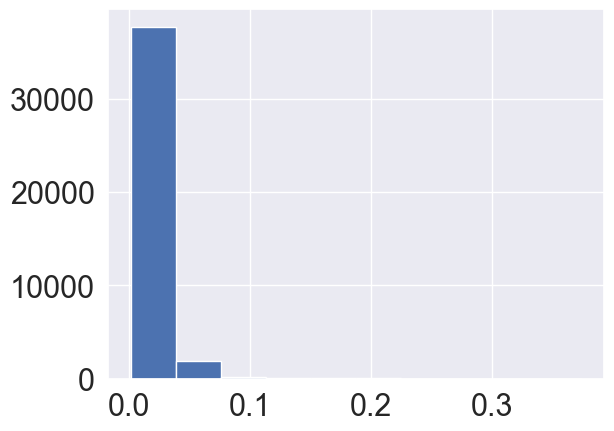

In [76]:
pd.Series(reconstruction_error).hist()

<Axes: >

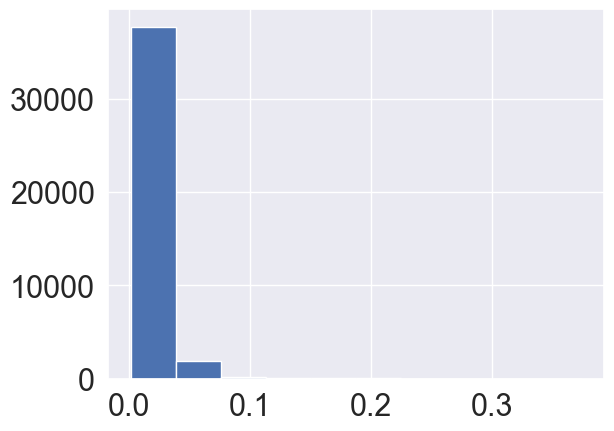

In [77]:
pd.Series(reconstruction_error).hist()

In [78]:
# accuracy
threshold_of_reconstruction_error = 0.242
accuracy = np.mean((reconstruction_error > threshold_of_reconstruction_error) == gan_df['reported'].values)

In [79]:
accuracy

0.9819

In [80]:
predicted_labels = [1 if error > threshold_of_reconstruction_error else 0 for error in reconstruction_error]

# Convert reconstruction errors into probabilities between 0 and 1
predicted_probabilities = (reconstruction_error - min(reconstruction_error)) / (max(reconstruction_error) - min(reconstruction_error))

# Assuming df has a 'reported' column with true labels
true_labels = gan_df['reported'].values

In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve

# Calculate metrics
f1 = f1_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, predicted_probabilities)

# Calculate FPR
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
fpr = fp / (fp + tn)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'False Positive Rate (FPR): {fpr:.4f}')

F1 Score: 0.0973
Precision: 0.9286
Recall: 0.0513
Accuracy: 0.9819
ROC AUC: 0.7422
False Positive Rate (FPR): 0.0001


### Train a new Autoencoder with the whole dataset and then test 

In [94]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(46, 23),  # Encode_1: 48 -> 24
            nn.Tanh(),
            nn.Linear(23, 12),  # Encode_2: 24 -> 12
            nn.ReLU(),
            nn.Linear(12, 6),  # Encode_3: 12 -> 6
            nn.LeakyReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),  # Decode_1: 6 -> 12
            nn.Tanh(),
            nn.Linear(12, 23),  # Decode_2: 12 -> 24
            nn.ReLU(),
            nn.Linear(23, 46),  # Decode_3: 24 -> 48
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [95]:
train_size = int(len(gan_df) * 0.75)

train_data = gan_df[input_columns].iloc[:train_size]
test_data = gan_df[input_columns].iloc[train_size:]
# train_df = sorted_df[:train_size]
# test_df = sorted_df[train_size:]

train_labels = gan_df['reported']
test_labels = gan_df['reported']

# Filter training data to only include normal transactions
normal_train_data = train_data[train_labels == 0]  

/var/folders/l0/myv4vn5x1tq6rttc145y03180000gn/T/ipykernel_9796/2420697382.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normal_train_data = train_data[train_labels == 0]


In [96]:
train_tensor = torch.tensor(normal_train_data.values, dtype=torch.float32)
test_tensor = torch.tensor(test_data.values, dtype=torch.float32)


batch_size = 200
train_dataset = torch.utils.data.TensorDataset(train_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


lambda_reg = 1e-3

# Model initialization
model = Autoencoder()

# Choice of loss
loss_type = 'MSE'  # Choose between 'MSE' and 'BCE'
if loss_type == 'MSE':
    criterion = nn.MSELoss()  # Mean squared error loss
else:
    criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss. Use if you have a sigmoid activation in the output layer.

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=lambda_reg)  #  torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping setup
best_loss = float('inf')
patience = 10
epochs_without_improvement = 0

# Training loop with early stopping
num_epochs = 100

loss_values = []
test_loss_values = []
reconstruction_errors = []

In [97]:

for epoch in range(num_epochs):
    reconstruction_errors = []
    epoch_loss = 0.0
    for batch in train_dataloader:
        inputs = batch[0]

        # Zero the optimizer's gradient buffer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        mse_loss = criterion(outputs, inputs)
        
        # 3. Activity Regularizer
        # Assuming the first layer of the encoder is model.encoder[0]
        activity_regularizer = lambda_reg * torch.norm(model.encoder[0](inputs), 1)
        
        # Combining the regularized loss
        total_loss = mse_loss + activity_regularizer

        # Backward pass and optimization
        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()
    
    epoch_loss = epoch_loss / len(train_dataloader)

    # Save the loss value for plotting
    loss_values.append(epoch_loss)

    # Test the model
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        for batch in test_dataloader:
            inputs = batch[0]
            outputs = model(inputs)
            mse_loss = criterion(outputs, inputs)
            test_loss += mse_loss.item()

            batch_errors = torch.sum((outputs - inputs) ** 2, dim=1).numpy() # Sum of squared differences for each sample
            reconstruction_errors.extend(batch_errors)

        test_loss = test_loss / len(test_dataloader)
        test_loss_values.append(test_loss)

    model.train()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}")


    # Early stopping check
    if epoch_loss + 1e-5 < best_loss:
        best_loss = epoch_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement == patience:
        print("Early stopping due to no improvement in loss.")
        break

Epoch [1/100], Train Loss: 0.0311, Test Loss: 0.0149
Epoch [2/100], Train Loss: 0.0077, Test Loss: 0.0040
Epoch [3/100], Train Loss: 0.0052, Test Loss: 0.0040
Epoch [4/100], Train Loss: 0.0050, Test Loss: 0.0040
Epoch [5/100], Train Loss: 0.0050, Test Loss: 0.0040
Epoch [6/100], Train Loss: 0.0050, Test Loss: 0.0040
Epoch [7/100], Train Loss: 0.0051, Test Loss: 0.0040
Epoch [8/100], Train Loss: 0.0050, Test Loss: 0.0040
Epoch [9/100], Train Loss: 0.0053, Test Loss: 0.0040
Epoch [10/100], Train Loss: 0.0052, Test Loss: 0.0040
Epoch [11/100], Train Loss: 0.0054, Test Loss: 0.0040
Epoch [12/100], Train Loss: 0.0052, Test Loss: 0.0040
Epoch [13/100], Train Loss: 0.0054, Test Loss: 0.0040
Epoch [14/100], Train Loss: 0.0054, Test Loss: 0.0040
Epoch [15/100], Train Loss: 0.0054, Test Loss: 0.0040
Early stopping due to no improvement in loss.


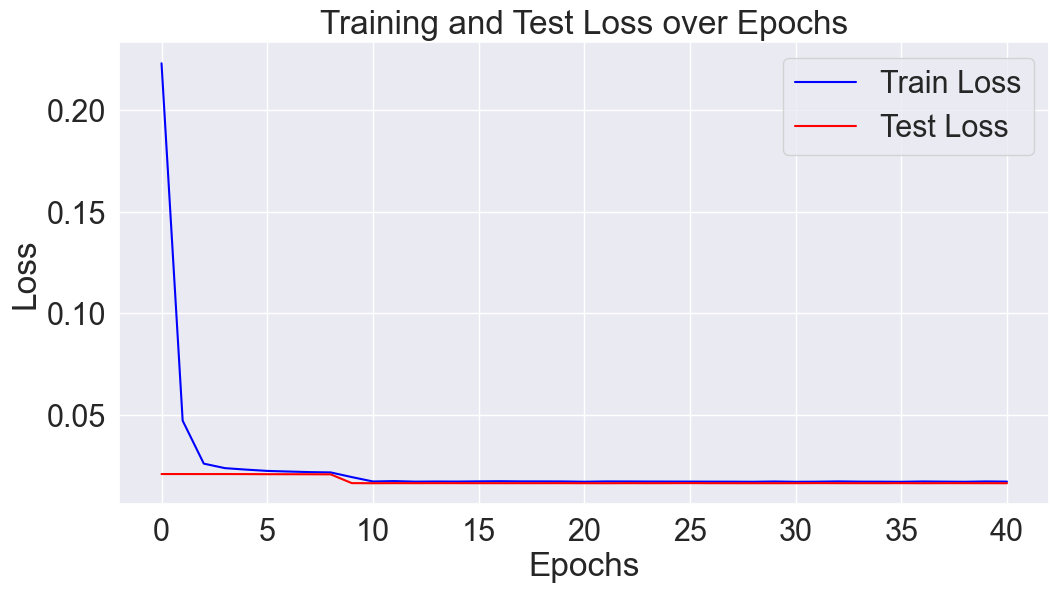

In [86]:
import matplotlib.pyplot as plt

# Plotting the training and test losses
plt.figure(figsize=(12, 6))
plt.plot(loss_values, label="Train Loss", color="blue")
plt.plot(test_loss_values, label="Test Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss over Epochs")
plt.legend()
plt.grid(True)
# plt.savefig('../../images/gan_loss_plot.png')
plt.show()

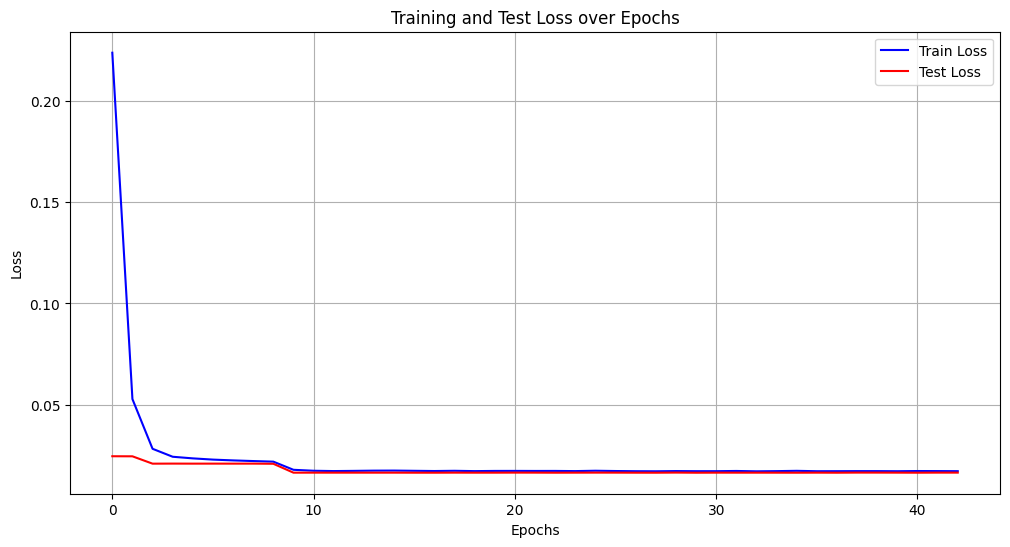

In [27]:
import matplotlib.pyplot as plt

# Plotting the training and test losses
plt.figure(figsize=(12, 6))
plt.plot(loss_values, label="Train Loss", color="blue")
plt.plot(test_loss_values, label="Test Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss over Epochs")
plt.legend()
plt.grid(True)
plt.savefig('../../images/gan_loss_plot.png')
plt.show()

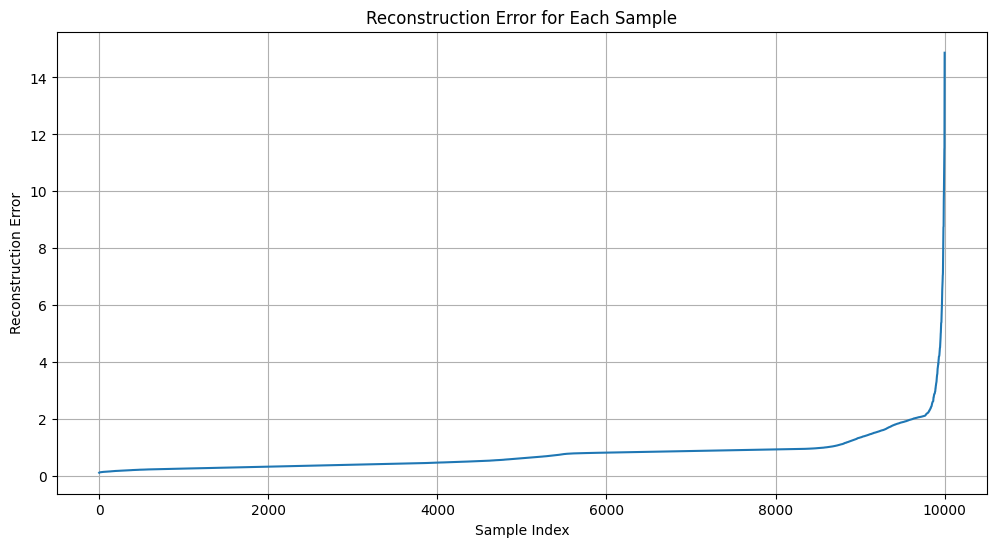

In [28]:
# sort and plot the reconstruction errors
reconstruction_errors.sort()
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors)
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Each Sample")
plt.savefig('../../images/gan_reconstruction_error_plot.png')
plt.grid(True)

In [98]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve

# Reconstruct the test data
with torch.no_grad():
    reconstructed_test = model(test_tensor).numpy()

In [99]:
# Calculate reconstruction error
reconstruction_errors = np.mean(np.power(test_data - reconstructed_test, 2), axis=1)

# Choose a threshold based on domain knowledge, the distribution of reconstruction errors, or via a validation set.
threshold = np.percentile(reconstruction_errors, 99)  # e.g., 99th percentile as threshold. This is a naive approach; refine based on your needs.

# Convert reconstruction errors into binary labels (0 or 1)
predicted_labels = [1 if error > threshold else 0 for error in reconstruction_errors]

# Convert reconstruction errors into probabilities between 0 and 1
predicted_probabilities = (reconstruction_errors - min(reconstruction_errors)) / (max(reconstruction_errors) - min(reconstruction_errors))

# Assuming df has a 'reported' column with true labels
true_labels = gan_df['reported'].loc[test_data.index].values

In [31]:
# Calculate metrics
f1 = f1_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, predicted_probabilities)

# Calculate FPR
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
fpr = fp / (fp + tn)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'False Positive Rate (FPR): {fpr:.4f}')

F1 Score: 0.3158
Precision: 0.4500
Recall: 0.2432
Accuracy: 0.9805
ROC AUC: 0.7343
False Positive Rate (FPR): 0.0056


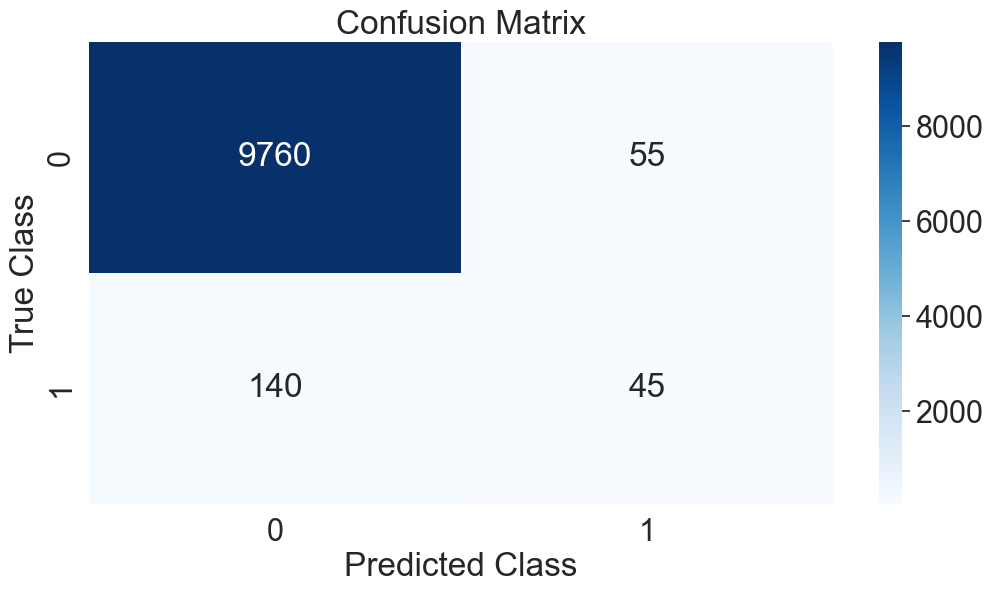

In [49]:
    # heatmap of confusion matrix
import seaborn as sns

sns.set(font_scale=2) 
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('../../images/gan_confusion_matrix.png')
plt.show()

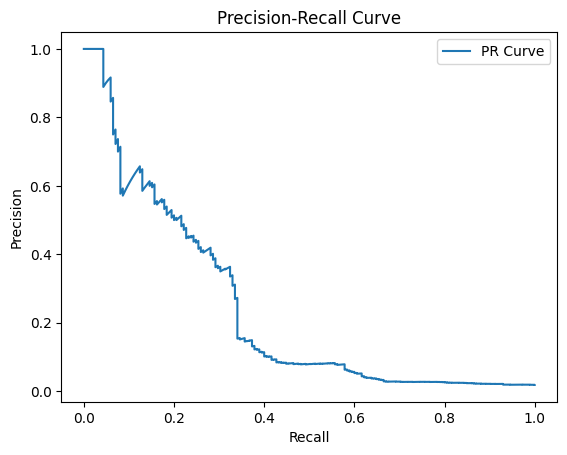

In [33]:
# 1. PR Curve
precision_vals, recall_vals, _ = precision_recall_curve(true_labels, predicted_probabilities)
plt.figure()
plt.plot(recall_vals, precision_vals, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

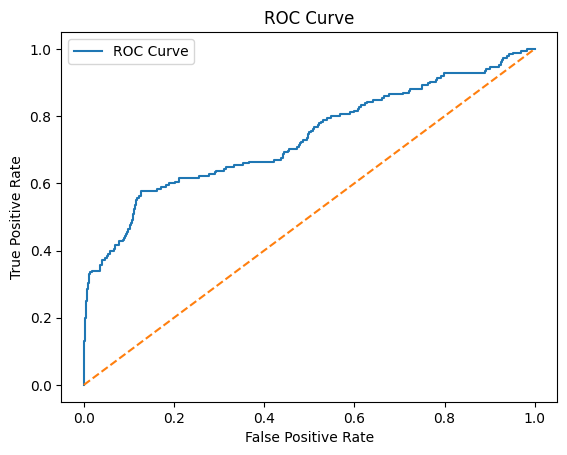

In [34]:
# 2. ROC Curve
fpr_vals, tpr_vals, _ = roc_curve(true_labels, predicted_probabilities)
plt.figure()
plt.plot(fpr_vals, tpr_vals, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

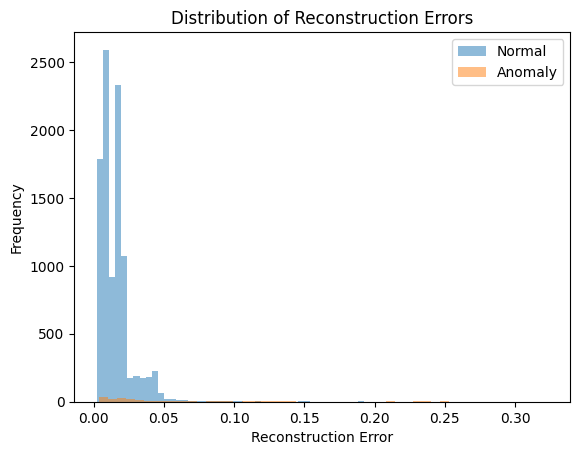

In [35]:
# 3. Distribution of Reconstruction Errors
plt.figure()
plt.hist(reconstruction_errors[true_labels == 0], bins=50, alpha=0.5, label='Normal')
plt.hist(reconstruction_errors[true_labels == 1], bins=50, alpha=0.5, label='Anomaly')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Errors')
plt.legend()
plt.show()

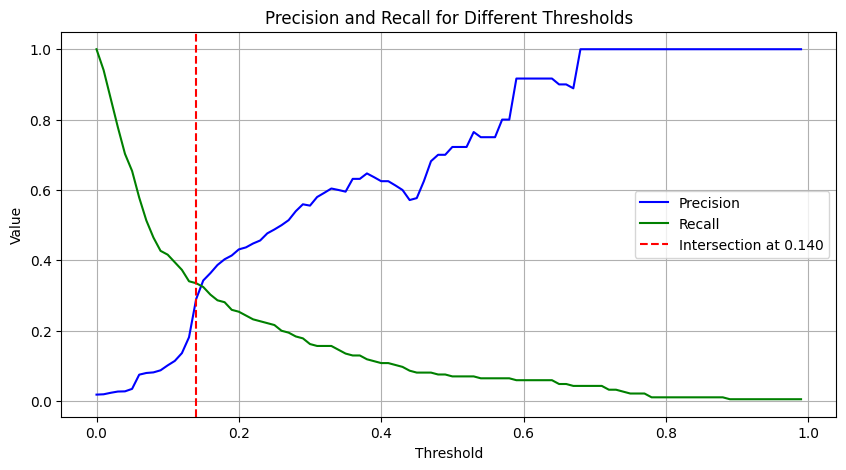

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Assuming the other parts of your code, where you compute `predicted_probabilities` and `true_labels`, are above this

# List to store precision and recall values for each threshold
precisions = []
recalls = []

# Iterate over a range of thresholds (e.g., from 0 to 1 with a step of 0.01)
thresholds = np.arange(0, 1, 0.01)  # Adjust the range and step as needed

for threshold in thresholds:
    # Calculate predicted labels for this threshold
    predicted_labels_threshold = [1 if error > threshold else 0 for error in predicted_probabilities]
    
    # Avoiding a scenario where there's a perfect precision or recall which can cause "UndefinedMetricWarning"
    if len(np.unique(predicted_labels_threshold)) > 1:
        # Compute precision and recall
        precision = precision_score(true_labels, predicted_labels_threshold)
        recall = recall_score(true_labels, predicted_labels_threshold)
    else:
        precision, recall = 0, 0

    precisions.append(precision)
    recalls.append(recall)

# Find the threshold where precision and recall cross
diffs = np.array(precisions) - np.array(recalls)
cross_points = np.where(np.diff(np.sign(diffs)))[0]  # Where the difference changes sign

# Plot
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')

# If there's an intersection point, plot it
if len(cross_points) > 0:
    cross_threshold = thresholds[cross_points[0]]
    plt.axvline(x=cross_threshold, color='red', linestyle='--', label=f'Intersection at {cross_threshold:.3f}')

plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()
plt.grid(True)
plt.savefig('../../images/gan_precision_recall_plot.png')
plt.show()


In [37]:
if len(cross_points) > 0:
    cross_threshold = thresholds[cross_points[0]]

    # Use the cross_threshold to convert predicted_probabilities into binary labels
    predicted_labels_cross_threshold = [1 if prob > cross_threshold else 0 for prob in predicted_probabilities]

    # Calculate metrics
    f1 = f1_score(true_labels, predicted_labels_cross_threshold)
    precision = precision_score(true_labels, predicted_labels_cross_threshold)
    recall = recall_score(true_labels, predicted_labels_cross_threshold)
    accuracy = accuracy_score(true_labels, predicted_labels_cross_threshold)
    roc_auc = roc_auc_score(true_labels, predicted_probabilities)

    # Calculate FPR
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels_cross_threshold).ravel()
    fpr = fp / (fp + tn)

    # Print out the metrics
    print(f'\nMetrics for threshold = {cross_threshold:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'False Positive Rate (FPR): {fpr:.4f}')


Metrics for threshold = 0.1400
F1 Score: 0.3188
Precision: 0.3039
Recall: 0.3351
Accuracy: 0.9735
ROC AUC: 0.7300
False Positive Rate (FPR): 0.0145
